In [1]:
import windIO
from windIO.utils.yml_utils import validate_yaml, Loader, load_yaml
from foxes_api import runFoxes
from pywake_api import run_pywake
import os
import xarray as xr
from windIO.utils import plant_schemas_path
import matplotlib.pyplot as plt

/Users/julianquick/miniconda3/envs/sgd/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/julianquick/miniconda3/envs/sgd/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
yml_input = '../examples/cases/windio_4turbines/wind_energy_system/FLOW_toy_study_wind_energy_system.yaml'
os.makedirs('output', exist_ok=True)

In [3]:
validate_yaml(yml_input, plant_schemas_path + 'wind_energy_system.yaml')

Validation succeeded


In [4]:
runFoxes(yml_input)

Reading windio file ../examples/cases/windio_4turbines/wind_energy_system/FLOW_toy_study_wind_energy_system.yaml
  Name: FLOW UQ vnv study on toy problem, 4 WT Wind Farm
  Contents: ['site', 'wind_farm', 'attributes']
Reading site
  Name: FLOW UQ vnv study on toy problem, 4 WT Wind Farm
  Contents: ['boundaries', 'energy_resource']
Ignoring variable 'friction_velocity'
Reading wind farm
  Name: FLOW UQ vnv study on toy problem, 4 WT Wind Farm
  Contents: ['layouts', 'turbines']
Reading attributes
  Contents: ['flow_model', 'analysis', 'outputs']
Running flow model 'foxes', overruling original choice 'pyWake'
Creating windio runner
Writing file results/recorded_input.yaml
Creating algorithm 'Downwind'
Running farm_calc
Running output: StateTurbineTable
Writing file results/turbine_data.nc
Running output: SliceData

Initializing algorithm 'Downwind'
Initializing model 'Downwind'
Initializing model 'Timeseries'
Initializing model 'centre'
Initializing model 'basic_ctrl_prer'
Initializing 

In [5]:
run_pywake(yml_input)

(1000,) ()
aep is  <xarray.DataArray 'AEP [GWh]' ()>
array(158.78097756) GWh
(0.45 capcacity factor)
<xarray.SimulationResult>
Dimensions:      (wt: 4, time: 1000)
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * wt           (wt) int64 0 1 2 3
    wd           (time) float64 271.8 266.2 268.7 273.6 ... 276.0 266.8 267.1
    ws           (time) float64 10.09 10.23 8.798 9.662 ... 9.704 9.613 10.36
    type         (wt) float64 0.0 0.0 0.0 0.0
Data variables: (12/14)
    WS_eff       (wt, time) float64 10.09 10.23 8.798 9.662 ... 8.826 7.78 8.291
    TI_eff       (wt, time) float64 2.619 1.537 1.651 3.15 ... 4.891 3.751 4.124
    Power        (wt, time) float64 7.056e+03 7.378e+03 ... 3.254e+03 3.939e+03
    CT           (wt, time) float64 0.814 0.814 0.814 ... 0.814 0.8237 0.814
    yaw          int64 0
    tilt         int64 0
    ...           ...
    y            (wt) int64 0 0 0 0
    WD           (time) float64 271.8 266.2 268.7 273.6 

<xarray.DataArray 'AEP [GWh]' ()>
array(158.78097756)

In [6]:
pywake_dat = xr.load_dataset('output/PowerTable.nc')
pywake_dat

<xarray.Dataset>
Dimensions:               (turbine: 4, time: 1000)
Coordinates:
  * time                  (time) int64 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * turbine               (turbine) int64 0 1 2 3
    wd                    (time) float64 271.8 266.2 268.7 ... 276.0 266.8 267.1
    ws                    (time) float64 10.09 10.23 8.798 ... 9.704 9.613 10.36
    type                  (turbine) float64 0.0 0.0 0.0 0.0
Data variables:
    power                 (turbine, time) float64 7.056e+03 ... 3.939e+03
    effective_wind_speed  (turbine, time) float64 10.09 10.23 ... 7.78 8.291

In [7]:
foxes_dat = xr.load_dataset('./results/turbine_data.nc')
foxes_dat 

<xarray.Dataset>
Dimensions:                   (time: 1000, turbine: 4)
Coordinates:
  * time                      (time) float64 0.0 1.0 2.0 ... 997.0 998.0 999.0
  * turbine                   (turbine) int64 0 1 2 3
Data variables:
    power                     (time, turbine) float64 7.056e+06 ... 3.946e+06
    rotor_effective_velocity  (time, turbine) float64 10.09 8.287 ... 8.295

Text(0, 0.5, 'Power (kW)')

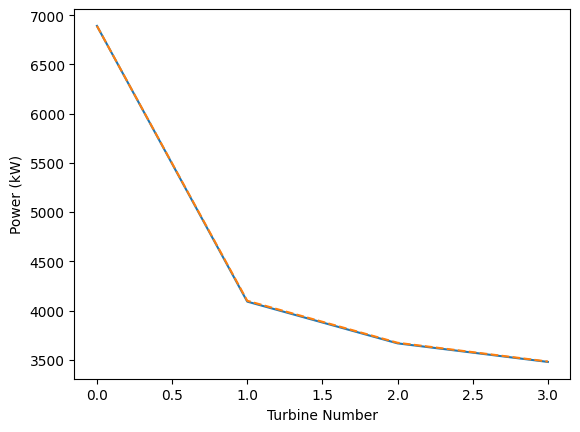

In [8]:
plt.plot(pywake_dat.turbine, pywake_dat.power.mean('time'))
plt.plot(foxes_dat.turbine, foxes_dat.power.mean('time') / 1e3, ls='--')
plt.xlabel('Turbine Number')
plt.ylabel('Power (kW)')

Text(0, 0.5, 'Power (kW)')

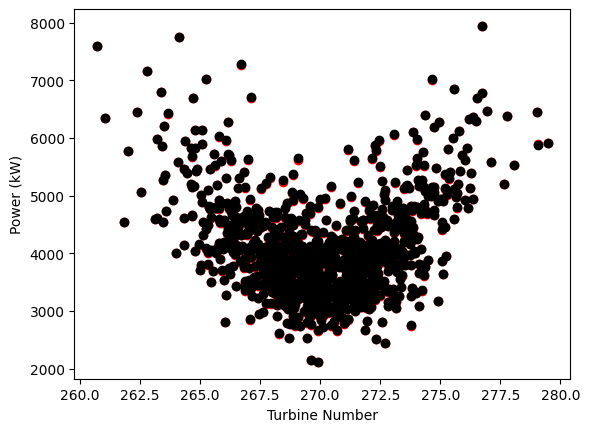

In [9]:
plt.scatter(pywake_dat.wd, pywake_dat.sel(turbine=1).power, c='r')
plt.scatter(pywake_dat.wd, foxes_dat.sel(turbine=1).power / 1e3, c='k')
plt.xlabel('Turbine Number')
plt.ylabel('Power (kW)')